## ML

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('ml-data.csv', delimiter=',', encoding= 'unicode_escape')

In [129]:
df_temp = pd.read_csv('fixed2-data.csv', delimiter=',', encoding= 'unicode_escape')

In [4]:
df.head(2)

,Id,Age,Race,Sex,Diagnosed,Diagnosed group,Stage,Months,Site,Sequence number,...,COD,COD2,Report,Property,Tumor size,Tumor size group,Surgery,Chemotherapy,Radiotherapy,Survive
0,22929427,15-19,White,Male,1975,1975-1999,Regional,31.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,NaN,94.0,85-115,No,No,No,Dead in 5
1,10123011,05-09,White,Male,1975,1975-1999,Regional,23.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,NaN,94.0,85-115,No,No,No,Dead in 5


## Fill nan values

In [30]:
df.isna().sum()

Id                    0
Age                   0
Race                  0
Sex                   0
Diagnosed             0
Diagnosed group       0
Stage                 0
Months                0
Site                  0
Sequence number       0
Malignat number       0
COD                   0
COD2                  0
Report                0
Property            338
Tumor size            0
Tumor size group      0
Surgery               0
Chemotherapy          0
Radiotherapy          0
Survive               0
dtype: int64

In [28]:
df.loc[df['Id']==21133065, 'Survive'] = 'Dead in 10+'

In [17]:
df.loc[(df['Stage']=='Localized')
      & (df['Site'] == 'Soft Tissue including Heart')
       & (df['COD'] == 'Dead Other Site')
      & (df['Chemotherapy'] == 'Yes')
        & (df['Radiotherapy'] == 'No')
       & (df['Tumor size group'] == '> 115'),
       'Months'
      ].mean()

81.0

In [34]:
df["Property"].fillna(lambda x: random.choice(df[df[column] != np.nan]["Property"]), inplace =True)

### Reorder columns

In [14]:
df.columns

Index(['Id', 'Age', 'Race', 'Sex', 'Diagnosed', 'Diagnosed group', 'Stage',
       'Months', 'Site', 'Sequence number', 'Malignat number', 'COD', 'COD2',
       'Report', 'Property', 'Tumor size', 'Tumor size group', 'Surgery',
       'Chemotherapy', 'Radiotherapy', 'Survive'],
      dtype='object')

In [13]:
df = df[['Id', 'Age', 'Race', 'Sex', 'Diagnosed', 'Diagnosed group',  'Stage', 
       'Months','Site','Sequence number', 'Malignat number', 'COD', 'COD2',  'Report',
       'Property', 'Tumor size','Tumor size group', 'Surgery', 'Chemotherapy', 'Radiotherapy',
        'Survive', ]]

## Making categories

In [18]:
df["Age"] = df["Age"].astype('category')

In [45]:
df = df.drop(['Id','Diagnosed','Months','Tumor size'], axis = 1)

df

In [46]:
for col in df.columns:
    print(col, ':', len(df[col].unique()),' labels')

Age : 5  labels
Race : 3  labels
Sex : 2  labels
Diagnosed group : 3  labels
Stage : 3  labels
Site : 4  labels
Sequence number : 4  labels
Malignat number : 4  labels
COD : 6  labels
COD2 : 3  labels
Report : 6  labels
Property : 4  labels
Tumor size group : 3  labels
Surgery : 3  labels
Chemotherapy : 2  labels
Radiotherapy : 2  labels
Survive : 4  labels


### One hot Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
#Create hot encoder
one_hot = OneHotEncoder(handle_unknown='ignore')

#Create one hot as en array based on nuber of entries to eval
one_hot_array = pd.DataFrame(one_hot.fit_transform(df[['Race']]).toarray())

df.join(one_hot_array).head()

,Id,Age,Race,Sex,Diagnosed,Diagnosed group,Stage,Months,Site,Sequence number,...,Property,Tumor size,Tumor size group,Surgery,Chemotherapy,Radiotherapy,Survive,0,1,2
0,22929427,15-19,White,Male,1975,1975-1999,Regional,31.0,Bones and Joints,One primary only,...,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,No,No,Dead in 5,0.0,0.0,1.0
1,10123011,05-09,White,Male,1975,1975-1999,Regional,23.0,Bones and Joints,One primary only,...,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,No,No,Dead in 5,0.0,0.0,1.0
2,28016877,15-19,White,Male,1975,1975-1999,Distant,28.0,Bones and Joints,One primary only,...,<function <lambda> at 0x00000218727CA3A0>,104.0,85-115,No,Yes,No,Dead in 5,0.0,0.0,1.0
3,10055225,15-19,White,Male,1975,1975-1999,Regional,11.0,Bones and Joints,One primary only,...,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,Yes,No,Dead in 5,0.0,0.0,1.0
4,5166438,15-19,White,Male,1975,1975-1999,Localized,31.0,Bones and Joints,One primary only,...,<function <lambda> at 0x00000218727CA3A0>,142.0,> 115,Yes,No,No,Dead in 5,0.0,0.0,1.0


### Inverse one hot encoding

In [42]:
print(one_hot.fit_transform(df[['Race']])[:5])
encode = one_hot.fit_transform(df[['Race']])

one_hot.inverse_transform(encode)[:5]

  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0


array([['White'],
       ['White'],
       ['White'],
       ['White'],
       ['White']], dtype=object)

# Make all columns one hot encoded

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               2581 non-null   object
 1   Race              2581 non-null   object
 2   Sex               2581 non-null   object
 3   Diagnosed group   2581 non-null   object
 4   Stage             2581 non-null   object
 5   Site              2581 non-null   object
 6   Sequence number   2581 non-null   object
 7   Malignat number   2581 non-null   int64 
 8   COD               2581 non-null   object
 9   COD2              2581 non-null   object
 10  Report            2581 non-null   object
 11  Property          2581 non-null   object
 12  Tumor size group  2581 non-null   object
 13  Surgery           2581 non-null   object
 14  Chemotherapy      2581 non-null   object
 15  Radiotherapy      2581 non-null   object
 16  Survive           2581 non-null   object
dtypes: int64(1), o

In [176]:
df['Survive'].value_counts()

Survive        1610
Dead in 5       806
Dead in 10      102
Dead in 10+      63
Name: Survive, dtype: int64

In [181]:
df = df2

In [134]:
df["Survive"] = df["Survive"].astype('category')
df.columns

Index(['Age', 'Race', 'Sex', 'Diagnosed group', 'Stage', 'Site',
       'Sequence number', 'Malignat number', 'COD', 'COD2', 'Report',
       'Property', 'Tumor size group', 'Surgery', 'Chemotherapy',
       'Radiotherapy', 'Survive'],
      dtype='object')

In [177]:
df_ohe = df
categorical_columns = ['Age', 'Race', 'Sex', 'Diagnosed group', 'Stage', 'Site',
       'Sequence number', 'COD', 'COD2', 'Report',
       'Property', 'Tumor size group', 'Surgery', 'Chemotherapy',
       'Radiotherapy']

for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [178]:
print(df_ohe.columns)

Index(['Malignat number', 'Survive', 'Age_00', 'Age_01-04', 'Age_05-09',
       'Age_10-14', 'Age_15-19', 'Race_Black', 'Race_Other', 'Race_White',
       'Sex_Female', 'Sex_Male', 'Diagnosed group_1975-1999',
       'Diagnosed group_2000-2009', 'Diagnosed group_2010-2018',
       'Stage_Distant', 'Stage_Localized', 'Stage_Regional',
       'Site_Bones and Joints', 'Site_Kidney and Renal Pelvis', 'Site_Other',
       'Site_Soft Tissue including Heart',
       'Sequence number_1st of 2 or more primaries',
       'Sequence number_2nd of 2 or more primaries',
       'Sequence number_3rd of 3 or more primaries',
       'Sequence number_One primary only', 'COD_Alive', 'COD_Bones and Joints',
       'COD_Brain and Other Nervous System', 'COD_Dead Other Site',
       'COD_Other Cause of Death', 'COD_Soft Tissue including Heart',
       'COD2_Alive or dead of other cause',
       'COD2_Dead (attributable to this cancer dx)',
       'COD2_Dead (missing/unknown COD)', 'Report_Death certificate o

In [182]:
df_ohe['Survive'] = df_ohe['Survive'].astype('category').cat.codes

In [183]:
df_ohe['Survive'].value_counts()

3    1610
2     806
0     102
1      63
Name: Survive, dtype: int64

# Decision tree

In [186]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# split training and test
training, test = train_test_split(df_ohe, test_size=0.25, random_state=35)




In [187]:
features = training.drop(['Survive'], axis=1).columns


In [188]:
training


,Malignat number,Survive,Age_00,Age_01-04,Age_05-09,Age_10-14,Age_15-19,Race_Black,Race_Other,Race_White,...,Tumor size group_85-115,Tumor size group_< 85,Tumor size group_> 115,Surgery_No,Surgery_Unknown,Surgery_Yes,Chemotherapy_No,Chemotherapy_Yes,Radiotherapy_No,Radiotherapy_Yes
2464,1,3,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
2399,1,3,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
2188,1,3,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
2204,1,3,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1908,1,3,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1,2,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
1675,1,3,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
951,1,3,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1295,1,3,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0


### Cross validation

In [158]:
from matplotlib import pyplot as plt

Optimalan broj atributa : 7


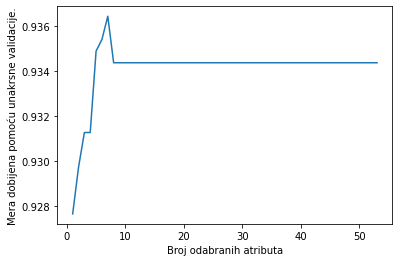

In [192]:
dtree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
rfecv = RFECV(estimator=dtree_clf, cv=StratifiedKFold(5), scoring='f1_micro')

rfecv.fit(training[features], training['Survive'])

print("Optimalan broj atributa : %d" % rfecv.n_features_)

#Prikazujemo broj atributa i rezultate unakrsne validacije 
plt.figure()
plt.xlabel("Broj odabranih atributa")
plt.ylabel("Mera dobijena pomoću unakrsne validacije.")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [193]:
features[rfecv.support_]

Index(['Diagnosed group_2010-2018', 'Site_Bones and Joints',
       'Sequence number_1st of 2 or more primaries', 'COD_Alive',
       'COD_Other Cause of Death', 'COD2_Alive or dead of other cause',
       'Radiotherapy_No'],
      dtype='object')

In [197]:
from sklearn.metrics import classification_report

print(classification_report(test['Survive'], rfecv.predict(test[features])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.26      0.42      0.32        12
           2       0.90      0.96      0.93       206
           3       1.00      1.00      1.00       406

    accuracy                           0.94       646
   macro avg       0.54      0.59      0.56       646
weighted avg       0.92      0.94      0.93       646



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
importance = rfecv.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, tick_label=['Malignat number', 'Survive', 'Age_00', 'Age_01-04', 'Age_05-09',
       'Age_10-14', 'Age_15-19', 'Race_Black', 'Race_Other', 'Race_White',
       'Sex_Female', 'Sex_Male', 'Diagnosed group_1975-1999',
       'Diagnosed group_2000-2009', 'Diagnosed group_2010-2018',
       'Stage_Distant', 'Stage_Localized', 'Stage_Regional',
       'Site_Bones and Joints', 'Site_Kidney and Renal Pelvis', 'Site_Other',
       'Site_Soft Tissue including Heart',
       'Sequence number_1st of 2 or more primaries',
       'Sequence number_2nd of 2 or more primaries',
       'Sequence number_3rd of 3 or more primaries',
       'Sequence number_One primary only', 'COD_Alive', 'COD_Bones and Joints',
       'COD_Brain and Other Nervous System', 'COD_Dead Other Site',
       'COD_Other Cause of Death', 'COD_Soft Tissue including Heart',
       'COD2_Alive or dead of other cause',
       'COD2_Dead (attributable to this cancer dx)',
       'COD2_Dead (missing/unknown COD)', 'Report_Death certificate only',
       'Report_Hospital inpatient/outpatient or clinic',
       'Report_Laboratory only (hospital or private)',
       'Report_Other hospital outpatient unit or surgery center (2006+)',
       'Report_Physicians office/private medical practitioner (LMD)',
       'Report_Radiation treatment or medical oncology center (2006+)',
       'Property_$60,000 - $74,999', 'Property_$75,000+', 'Property_< $60,999',
       'Tumor size group_85-115', 'Tumor size group_< 85',
       'Tumor size group_> 115', 'Surgery_No', 'Surgery_Unknown',
       'Surgery_Yes', 'Chemotherapy_No', 'Chemotherapy_Yes', 'Radiotherapy_No',
       'Radiotherapy_Yes'])
plt.xticks(rotation='vertical')

AttributeError: 'RFECV' object has no attribute 'feature_importances_'

In [54]:
df['Diagnosed group'].value_counts()

2000-2009    992
2010-2018    862
1975-1999    727
Name: Diagnosed group, dtype: int64

In [37]:
df.to_csv('ml-data.csv', index= False)
df.to_csv('ml2-data.csv', index= False)

,Id,Age,Race,Sex,Diagnosed,Diagnosed group,Stage,Months,Site,Sequence number,...,COD,COD2,Report,Property,Tumor size,Tumor size group,Surgery,Chemotherapy,Radiotherapy,Survive
0,22929427,15-19,White,Male,1975,1975-1999,Regional,31.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,No,No,Dead in 5
1,10123011,05-09,White,Male,1975,1975-1999,Regional,23.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,No,No,Dead in 5
2,28016877,15-19,White,Male,1975,1975-1999,Distant,28.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,<function <lambda> at 0x00000218727CA3A0>,104.0,85-115,No,Yes,No,Dead in 5
3,10055225,15-19,White,Male,1975,1975-1999,Regional,11.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,<function <lambda> at 0x00000218727CA3A0>,94.0,85-115,No,Yes,No,Dead in 5
4,5166438,15-19,White,Male,1975,1975-1999,Localized,31.0,Bones and Joints,One primary only,...,Bones and Joints,Dead (attributable to this cancer dx),Hospital inpatient/outpatient or clinic,<function <lambda> at 0x00000218727CA3A0>,142.0,> 115,Yes,No,No,Dead in 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,46141605,01-04,White,Male,2018,2010-2018,Localized,6.0,Bones and Joints,One primary only,...,Alive,Alive or dead of other cause,Hospital inpatient/outpatient or clinic,"< $60,999",74.0,< 85,Yes,Yes,Yes,Survive
2577,46144083,15-19,White,Male,2018,2010-2018,Localized,7.0,Bones and Joints,One primary only,...,Alive,Alive or dead of other cause,Hospital inpatient/outpatient or clinic,"$60,000 - $74,999",16.0,< 85,Yes,Yes,Yes,Survive
2578,46146654,01-04,White,Male,2018,2010-2018,Localized,9.0,Bones and Joints,One primary only,...,Alive,Alive or dead of other cause,Hospital inpatient/outpatient or clinic,"$75,000+",60.0,< 85,Yes,Yes,Yes,Survive
2579,46215234,10-14,White,Male,2018,2010-2018,Localized,3.0,Bones and Joints,One primary only,...,Alive,Alive or dead of other cause,Hospital inpatient/outpatient or clinic,"$75,000+",105.0,85-115,No,Yes,No,Survive


In [58]:
df2 = pd.read_csv('ml2-data.csv', delimiter=',', encoding= 'unicode_escape')

In [123]:
df['Property'].value_counts()

$60,000 - $74,999    1081
$75,000+              852
< $60,999             648
Name: Property, dtype: int64

In [110]:
df.loc[(df['Property']!='$60,000 - $74,999') &  
      (df['Property']!='$75,000+') &
      (df['Property']!='< $60,999'), 'Property'] = np.nan

In [66]:
import numpy as np
import random

In [108]:
df["Property"].fillna(lambda x: random.choice(df[df['Property'] != np.nan]["Property"]), inplace =True)

In [118]:
def randomiseMissingData(df2):
    "randomise missing data for DataFrame (within a column)"
    df = df2.copy()
    for col in df.columns:
        data = df[col]
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples

    return df

In [121]:
df = randomiseMissingData(df)

<ipython-input-118-c3c857110875>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mask] = samples


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               2581 non-null   object
 1   Race              2581 non-null   object
 2   Sex               2581 non-null   object
 3   Diagnosed group   2581 non-null   object
 4   Stage             2581 non-null   object
 5   Site              2581 non-null   object
 6   Sequence number   2581 non-null   object
 7   Malignat number   2581 non-null   int64 
 8   COD               2581 non-null   object
 9   COD2              2581 non-null   object
 10  Report            2581 non-null   object
 11  Property          2581 non-null   object
 12  Tumor size group  2581 non-null   object
 13  Surgery           2581 non-null   object
 14  Chemotherapy      2581 non-null   object
 15  Radiotherapy      2581 non-null   object
 16  Survive           2581 non-null   object
dtypes: int64(1), o